# Task1: TITANIC SURVIVAL PREDICTION
####  By TARANJEET KAUR
####  FEB Batch, Domain: Data Science
####  Objective: To build a model that predicts whether a passenger on the Titanic survived or not.

# Importing Necessary Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("C:/Users/Taranjeet Kaur/Downloads/Titanic-Dataset.csv")

In [36]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [37]:
df.shape

(891, 12)

# ANALYSING DATA

## Count of people where 0 indicates not survived and 1 indicates survived

Text(0.5, 1.0, 'COUNT OF PASSENGER SURVIVED AND NOT SURVIVED')

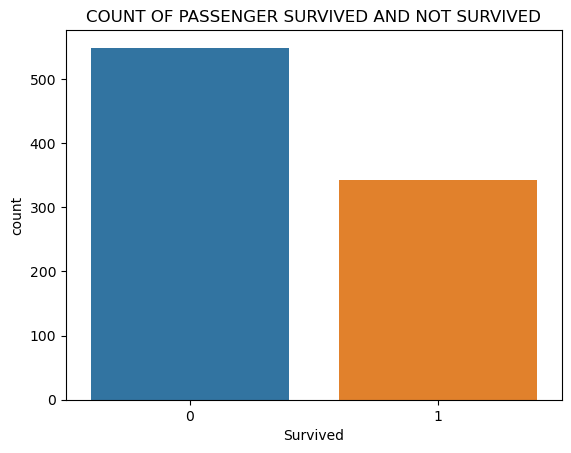

In [38]:
sns.countplot(x="Survived", data = df, palette = "tab10")
plt.title('COUNT OF PASSENGER SURVIVED AND NOT SURVIVED')

## Count of survival based on sex

Text(0.5, 1.0, 'COUNT OF PASSENGER SURVIVAL BASED ON SEX')

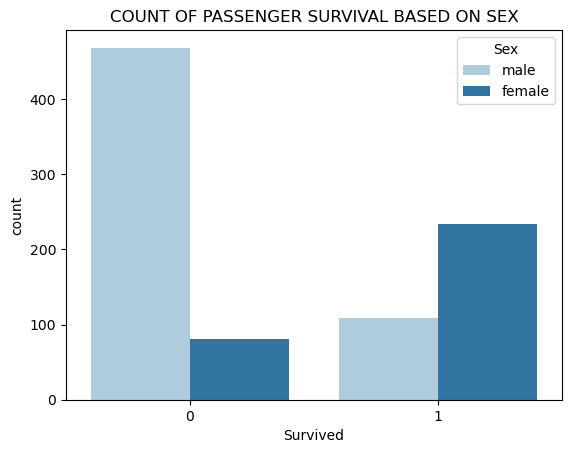

In [39]:
sns.countplot(x="Survived", hue="Sex", data = df, palette = "Paired")
plt.title('COUNT OF PASSENGER SURVIVAL BASED ON SEX')

Text(0.5, 1.0, 'COUNT OF PASSENGER SURVIVAL BASED ON SEX AND PCLASS')

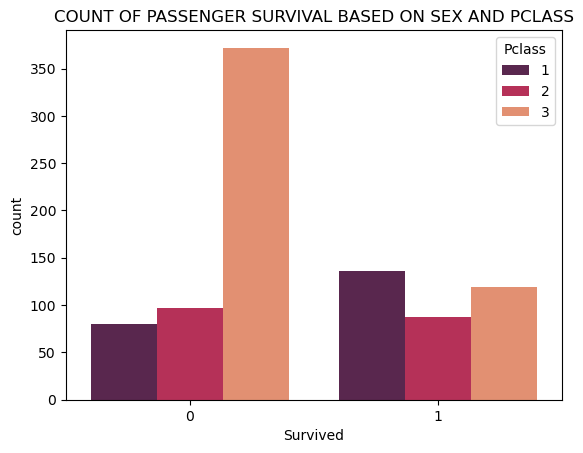

In [40]:
sns.countplot(x="Survived", hue="Pclass", data = df, palette = "rocket")
plt.title('COUNT OF PASSENGER SURVIVAL BASED ON SEX AND PCLASS')

Text(0.5, 0, 'AGE GROUP')

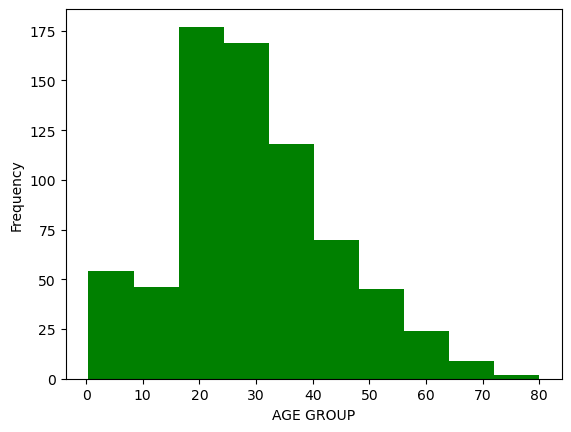

In [41]:
df["Age"].plot.hist(color = "green")
plt.xlabel("AGE GROUP")

## We Analyzed that highest travellers are belong to young age group and very few passengers in 70-80 age group

Text(0.5, 1.0, 'FARE DISTRIBUTION')

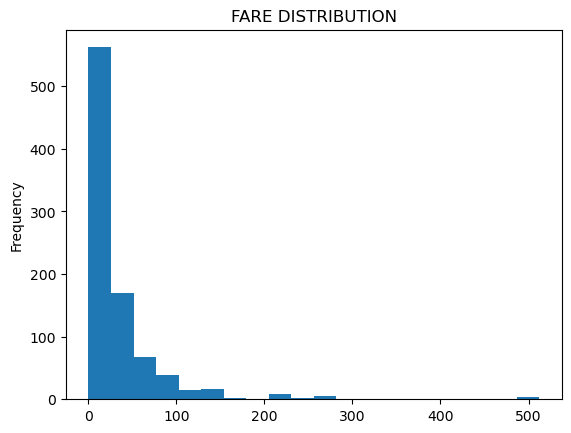

In [42]:
df["Fare"].plot.hist(bins=20)
plt.title("FARE DISTRIBUTION")

## Here we observed that most of the tickets bought are under fare 100

# Data Wrangling 
## Cleaning the data and removing the null values

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df.dropna(inplace= True)

In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] = labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [48]:
df = df.drop(['Age'], axis = 1)

In [49]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",1,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",1,0,0,113788,35.5000,A6,S


In [50]:
x = df[['Pclass', 'Sex']]
y = df['Survived']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [53]:
log.fit(x_train, y_train)

LogisticRegression()

In [54]:
prediction = log.predict(x_test)
print(prediction)

[1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1]


In [55]:
print(y_test)

473    1
110    0
195    1
492    0
835    1
806    0
27     0
681    1
319    1
366    1
21     1
550    1
871    1
632    1
781    1
717    1
581    1
520    1
394    1
742    1
341    1
305    1
218    1
707    1
11     1
332    0
453    1
879    1
262    0
452    0
540    1
327    1
151    1
318    1
820    1
759    1
52     1
Name: Survived, dtype: int64


In [56]:
from sklearn.metrics import accuracy_score

# Accuracy Score

In [57]:
accuracy_score(y_test, prediction)

0.8108108108108109